# Chapter 21 - Lies, Damned Lies and Statistics

*“If you can't prove what you want to prove, demonstrate something else and
pretend they are the same thing. In the daze that follows the collision of statistics with the human mind, hardly anyone will notice the difference.”* -Darrel Huff, *How to Lie with Statistics*

*__Statistical thinking is a relatively new invention. For most of recorded history
things were assessed qualitatively rather than quantitatively__*. People must have
had an intuitive sense of some statistical facts (e.g., that women are usually shorter than men), but they had no mathematical tools that would allow them to proceed from anecdotal evidence to statistical conclusions. 

This started to change in
the middle of the 17th century, most notably with the publication of John
Graunt’s Natural and Political Observations Made Upon the Bills of Mortality.
This pioneering work used statistical analysis to estimate the population of London from death rolls, and attempted to provide a model that could be used to
predict the spread of plague.

*__Alas, since that time people have used statistics as much to mislead as to inform. Some have willfully used statistics to mislead; others have merely been incompetent__*. In this chapter we discuss a few ways in which people can be fooled
into drawing inappropriate inferences from statistical data. We trust that you will
use this information only for good—to become a better consumer and a more
honest purveyor of statistical information.

## 21.1 Garbage In Garbage Out

*“On two occasions I have been asked [by members of Parliament], ‘Pray, Mr.
Babbage, if you put into the machine wrong figures, will the right answers
come out?’ I am not able rightly to apprehend the kind of confusion of ideas
that could provoke such a question.”* — Charles Babbage

*__The message here is a simple one. If the input data is seriously flawed, no
amount of statistical massaging will produce a meaningful result.__*

The 1840 United States census showed that insanity among free blacks and
mulattoes was roughly ten times more common than among enslaved blacks and
mulattoes. The conclusion was obvious. As U.S. Senator (and former Vice President and future Secretary of State) John C. Calhoun put it, “The data on insanity
revealed in this census is unimpeachable. From it our nation must conclude that
the abolition of slavery would be to the African a curse.” Never mind that it was
soon clear that the census was riddled with errors. As Calhoun reportedly explained to John Quincy Adams, “there were so many errors they balanced one
another, and led to the same conclusion as if they were all correct.”

Calhoun’s (perhaps willfully) spurious response to Adams was based on a
classical error, the assumption of independence. Were he more sophisticated
mathematically, he might have said something like, “I believe that the measurement errors are unbiased and independent of each of other, and therefore evenly
distributed on either side of the mean.” In fact, later analysis showed that the errors were so heavily biased that no statistically valid conclusions could be
drawn.

## 21.2 Tests are Imperfect

Every experiment should be viewed as a potentially flawed test. We can perform
a test for a chemical, a phenomenon, a disease, etc. However, the event for which
we are testing is not necessarily the same as the result of the test. Professors design exams with the goal of understanding how well a student has mastered some
subject matter, but the result of the exam should not be confused with how much
a student actually understands. Every test has some inherent error rate. Imagine
that a student learning a second language has been asked to learn the meaning of
100 words, but has learned the meaning of only 80 of them. His rate of understanding is 80%, but the probability that he will score 80% on a test with 20
words is certainly not 1.

Tests can have both false negatives and false positives. As we saw in Chapter
20, a negative mammogram does not guarantee absence of breast cancer, and a
positive mammogram doesn’t guarantee its presence. Furthermore, the test probability and the event probability are not the same thing. This is especially relevant
when testing for a rare event, e.g., the presence of a rare disease. If the cost of a
false negative is high (e.g., missing the presence of a serious but curable disease),
the test should be designed to be highly sensitive, even at the cost of there being a
large number of false positives.

## 21.3 Pictures can be Deceiving

There can be no doubt about the utility of graphics for quickly conveying information. However, when used carelessly (or maliciously) a plot can be highly misleading. Consider, for example, the charts in Figure 21.1 depicting housing prices
in the U.S. Midwestern states.

![](house_prices.jpg)

Looking at the chart on the left of Figure 21.1, it seems as if housing prices
were pretty stable during the period 2006-2009. But wait a minute! Wasn’t there a
collapse of U.S. residential real estate followed by a global financial crisis in late
2008? There was indeed, as shown in the chart on the right.

These two charts show exactly the same data, but convey very different impressions. The chart on the left was designed to give the impression that housing
prices had been stable. On the y-axis, the designer used a scale ranging from the
absurdly low average price for a house of USD 1,000 to the improbably high average
price of USD 500,000. This minimized the amount of space devoted to the area where
prices are changing, giving the impression that the changes were relatively small.
The chart on the right was designed to give the impression that housing prices
moved erratically, and then crashed. The designer used a narrow range of prices,
so the sizes of the changes were exaggerated.

The code in Figure 21.2 produces the two plots we looked at above and a plot
intended to give an accurate impression of the movement of housing prices. It uses two plotting facilities that we have not yet seen. The call pylab.bar(quarters,
prices, width) produces a bar chart with bars of the given width. The left edges
of the bars are the values of the elements of the list quarters and the heights of the
bars are the values of the corresponding elements of the list prices. The function
call pylab.xticks(quarters+width/2, labels) describes the labels to be associated
with the bars. The first argument specifies where each label is to be placed and
the second argument the text of the labels. The function yticks behaves analogously. The call plotHousing('fair') produces the plot in Figure 21.3.

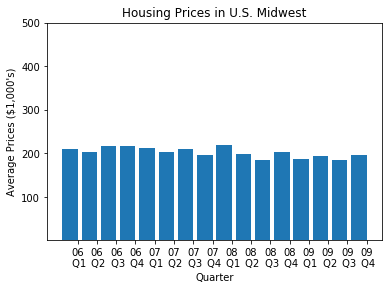

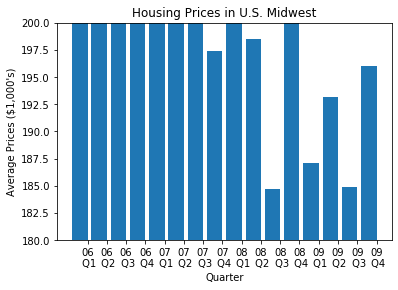

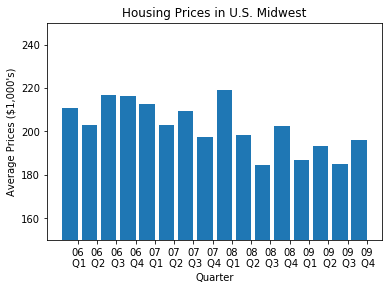

In [12]:
import pylab

def plotHousing(impression):
    """Assumes impression a str. Must be one of 'flat', 'volatile,' and 'fair'
       Produce bar chart of housing prices over time"""
    f = open('midWestHousingPrices.txt', 'r')
    
    #Each line of file contains year quarter price
    #for Midwest region of U.S.
    labels, prices = ([],[])
    for line in f:
        year, quarter, price = line.split()
        label = year[2:4] + '\n Q' + quarter[1]
        labels.append(label)
        prices.append(int(price)/1000)
    
    quarters = pylab.arange(len(labels)) #x coord of bars
    width = 0.8 #width of bars
    
    pylab.bar(quarters, prices, width)
    pylab.xticks(quarters+width/2, labels)
    pylab.title('Housing Prices in U.S. Midwest')
    pylab.xlabel('Quarter')
    pylab.ylabel('Average Prices ($1,000\'s)')
    
    if impression == 'flat':
        pylab.ylim(1, 500)
    elif impression == 'volatile':
        pylab.ylim(180, 200)
    elif impression == 'fair':
        pylab.ylim(150, 250)
    else:
        raise ValueError
        
plotHousing('flat')
pylab.figure()
plotHousing('volatile')
pylab.figure()
plotHousing('fair')

## 21.4 Cum Hoc Ergo Propter Hoc

It has been shown that college students who regularly attend class have higher
average grades than students who attend class only sporadically. Those of us who
teach these classes would like to believe that this is because the students learn
something from the classes we teach. Of course, it is at least equally likely that
those students get better grades because students who are more likely to attend
classes are also more likely to study hard.

*__Correlation is a measure of the degree to which two variables move in the
same direction. If x moves in the same direction as y, the variables are positively
correlated. If they move in opposite directions they are negatively correlated. If
there is no relationship, the correlation is 0__*. People’s heights are positively correlated with the heights of their parents. The correlation between hours spent playing video games and grade point average is negative.

When two things are correlated, there is a temptation to assume that one has
caused the other. Consider the incidence of flu in North America. The number of
cases rises and falls in a predictable pattern. There are almost no cases in the
summer; the number of cases starts to rise in the early fall and then starts dropping as summer approaches. Now consider the number of children attending
school. There are very few children in school in the summer, enrollment starts to
rise in the early fall, and then drops as summer approaches.

The correlation between the opening of schools and the rise in the incidence
of flu is inarguable. This has led many to conclude that that going to school is an
important causative factor in the spread of flu. That might be true, but one cannot conclude it based simply on the correlation. *__Correlation does not imply causation! After all, the correlation could be used just as easily to justify the belief
that flu outbreaks cause schools to be in session__*. Or perhaps there is no causal
relationship in either direction, and there is some lurking variable that we have
not considered that causes each. In fact, as it happens, the flu virus survives considerably longer in cool dry air than it does in warm wet air, and in North America both the flu season and school sessions are correlated with cooler and dryer
weather.

Given enough retrospective data, it is always possible to find two variables
that are correlated, as illustrated by the chart in Figure 21.4.

![](mex_lemons.jpg)

When such correlations are found, the first thing to do is to ask whether there is
a plausible theory explaining the correlation.

Falling prey to the cum hoc ergo propter hoc fallacy can be quite dangerous.
At the start of 2002, roughly six million American women were being prescribed
hormone replacement therapy (HRT) in the belief that it would substantially
lower their risk of cardiovascular disease. That belief was supported by several
highly reputable published studies that demonstrated a reduced incidence of cardiovascular death among women using HRT.

Many women, and their physicians, were taken by surprise when the Journal
of the American Medical Society published an article asserting that HRT in fact
increased the risk of cardiovascular disease.150 How could this have happened?

Reanalysis of some of the earlier studies showed that women undertaking
HRT were likely to be from groups with better than average diet and exercise regimes. Perhaps the women undertaking HRT were on average more health conscious than the other women in the study, so that taking HRT and improved
cardiac health were coincident effects of a common cause.

## 21.5 Statistical Measures Don't Tell the Whole Story

There are an enormous number of different statistics that can be extracted from a
data set. By carefully choosing among these, it is possible to convey a variety of
different impressions about the same data. A good antidote is to look at the data
set itself.

*__In 1973, the statistician F.J. Anscombe__* published a paper with the table in
Figure 21.5. It contains the <x,	y> coordinates of points from each of four data
sets. Each of the four data sets has the same mean value for x (9.0), the same
mean value for y (7.5), the same variance for x (10.0), the same variance for y
(3.75), and the same correlation between x and y (0.816). And if we use linear regression to fit a line to each, we get the same result for each, y	=	0.5x	+	3.

![](anscombe_quartet.jpg)

Does this mean that there is no obvious way to distinguish these data sets
from each other? No. One simply needs to plot the data to see that the data sets
are not at all alike (Figure 21.6).

![](anscombe_quartet2.jpg)

The moral is simple: if possible, always take a look at some representation of
the raw data.

## 21.6 Sampling Bias

During World War II, whenever an Allied plane would return from a mission
over Europe the plane would be inspected to see where the flak from antiaircraft
artillery had impacted. Based upon this data, mechanics reinforced those areas of
the planes that seemed most likely to be hit by flak.

What’s wrong with this? *__They did not inspect the planes that failed to return
from missions because they had been downed by flak. Perhaps these unexamined
planes failed to return precisely because they were hit in the places where the flak
would do the most damage. This particular error is called non-response bias__*. It is
quite common in surveys. At many universities, for example, students are asked
during one of the lectures late in the term to fill out a form rating the quality of
the professor’s lectures. Though the results of such surveys are often unflattering,
they could be worse. *__Those students who think that the lectures are so bad that
they aren’t worth attending are not included in the survey__*.

As discussed in Chapter 17, all statistical techniques are based upon the assumption that by sampling a subset of a population we can infer things about the
population as a whole. *__If random sampling is used, we can make precise mathematical statements about the expected relationship of the sample to the entire
population.__* Unfortunately, many studies, particularly in the social sciences, are
based on what is called *__convenience (or accidental) sampling. This involves
choosing samples based on how easy they are to procure__*. Why do so many psychological studies use populations of undergraduates? Because they are easy to
find on college campuses. A convenience sample might be representative, but
there is no way of knowing whether it actually is representative.

## 21.7 Context Matters

It is easy to read more into the data than it actually implies, especially when viewing the data out of context. On April 29, 2009, CNN reported that, “Mexican
health officials suspect that the swine flu outbreak has caused more than 159
deaths and roughly 2,500 illnesses.” Pretty scary stuff—until one compares it to
the 36,000 deaths attributable annually to the seasonal flu in the U.S.

An often quoted, and accurate, statistic is that most auto accidents happen
within 10 miles of home. So what? Most driving is done within 10 miles of home!
And besides, what does “home” mean in this context? The statistic is computed
using the address at which the automobile is registered as “home.” Might one reduce the probability of getting into an accident by merely registering one’s car in
some distant place?

Opponents of government initiatives to reduce the prevalence of guns in the
United States are fond of quoting the statistic that roughly 99.8% of the firearms
in the U.S. will not be used to commit a violent crime in any given year. But
without some context, it’s hard to know what that implies. Does it imply that
there is not much gun violence in the U.S.? The National Rifle Association reports that there are roughly 300 million privately owned firearms in the U.S.—
0.2% of 300 million is 600,000!

## 21.8 Beware of Extrapolation

It is all too easy to extrapolate from data. We did that in Section 18.1.1 when we
extended fits derived from linear regression beyond the data used in the regression. *__Extrapolation should be done only when one has a sound theoretical justification for doing so. Be especially wary of straight-line extrapolations.__*

Consider the plot on the left in Figure 21.7. It shows the growth of Internet
usage in the United States from 1994 to 2000. As you can see, a straight line provides a pretty good fit.

The plot on the right of Figure 21.7 uses this fit to project the percentage of
the U.S. population using the Internet in following years. The projection is a bit
hard to believe. *__It seems unlikely that by 2009 everybody in the U.S. was using
the Internet, and even less likely that by 2015 more than 140% of the U.S. population was using the Internet.__*

![](int_usage.jpg)

## 21.9 The Texas Sharpshooter Fallacy

Imagine that you are driving down a country road in Texas. You see a barn that
has six targets painted on it, and a bullet hole at the very center of each target.
“Yes sir,” says the owner of the barn, “I never miss.” “That’s right,” says his
spouse, “there ain’t a man in the state of Texas who’s more accurate with a paint
brush.” Got it? He fired the six shots, and then painted the targets around them.

A classic of the genre appeared in 2001.152 It reported that a research team at
the Royal Cornhill Hospital in Aberdeen had discovered that “anorexic women
are most likely to have been born in the spring or early summer… *__Between
March and June there were 13% more anorexics born than average, and 30%
more in June itself.”__*
Let’s look at that worrisome statistic for those women born in June. *__The team
studied 446 women who had been diagnosed as anorexic, so the mean number of
births per month was slightly more than 37. This suggests that the number born
in June was 48__* ($37 \times 13$). Let’s write a short program (Figure 21.9) to estimate the
probability that this occurred purely by chance.

In [18]:
import random

def juneProb(numTrials):
    june48 = 0
    for trial in range(numTrials):
        june = 0
        for i in range(446):
            if random.randint(1,12) == 6:
                june += 1
        if june >= 48:
            june48 += 1
    jProb = round(june48/numTrials, 4)
    print('Probability of at least 48 births in June = ', jProb)

In [19]:
juneProb(10000)

Probability of at least 48 births in June =  0.043


It looks as if the probability of at least 48 babies being born in June purely by
chance is around 4.5%. So perhaps those researchers in Aberdeen are on to
something. Well, *__they might have been on to something had they started with the
hypothesis that more babies who will become anorexic are born in June, and then
run a study designed to check that hypothesis.__*

But that is not what they did. Instead, they looked at the data and then, imitating the Texas sharpshooter, drew a circle around June. *__The right statistical
question to have asked is what is the probability that there was at least one month
(out of 12) in which at least 48 babies were born.__* The program in Figure 21.10
answers that question.

In [21]:
def anyProb(numTrials):
    anyMonth48 = 0
    for trial in range(numTrials):
        months = [0]*12
        for i in range(446):
            months[random.randint(0,11)] += 1
        if max(months) >= 48:
            anyMonth48 += 1
    aProb = round(anyMonth48/numTrials, 4)
    print('Probability of at least 48 births in some month = ', aProb)

In [24]:
anyProb(10000)

Probability of at least 48 births in some month =  0.436


It appears that it is not so unlikely after all that the results reported in the study
reflect a chance occurrence rather a real association between birth month and
anorexia. One doesn’t have to come from Texas to fall victim to the Texas Sharpshooter Fallacy.

What we see here is that the statistical significance of a result depends upon
the way the experiment was conducted. *__If the Aberdeen group had started out
with the hypothesis that more anorexics are born in June, their result would be
worth considering. But if they started off with the hypothesis that there exists a
month in which an unusually large proportion of anorexics are born, their result
is not very compelling.__* In effect, they were testing multiple hypothesis and probably should have applied a Bonferroni correction.

What next steps might the Aberdeen group have taken to test their newfound
hypothesis? One possibility is to conduct a prospective study. In a prospective
study, one starts with a set of hypotheses, recruits subjects before they have developed the outcome of interest (anorexia in this case), and then follows the subjects for a period of time. If the group had conducted a prospective study with a
specific hypothesis and gotten similar results, one might be convinced.

Prospective studies can be expensive and time-consuming to perform. In a
retrospective study, one has to examine existing data in ways that reduce the likelihood of getting misleading results. One common technique, as discussed in
Section 18.4, is to split the data into a training set and a held out test set. For example, they could have chosen 446/2 women at random from their data (the
training set), and tallied the number of births for each month. They could have
then compared that to the number of births each month for the remaining women (the holdout set).

## 21.10 Percentages can Confuse

An investment advisor called a client to report that the value of his stock portfolio had risen 16% over the last month. He admitted that there had been some ups
and downs over the year, but was pleased to report that the average monthly
change was +0.5%. Image the client’s surprise when he got his statement for the
year, and observed that the value of his portfolio had declined over the year.

He called his advisor, and accused him of being a liar. “It looks to me,” he
said, “like my portfolio declined by about 8%, and you told me that it went up by
0.5% a month.” “I did not,” the financial advisor replied, “I told you that the average monthly change was +0.5%.” When he examined his monthly statements,
the investor realized that he had not been lied to, just misled. His portfolio went
down by 15% in each month during the first half of the year, and then went up
by 16% in each month during the second half of the year.

When thinking about percentages, we always need to pay attention to the basis on which the percentage is computed. In this case, the 15% declines were on a
higher average basis than the 16% increases.

Percentages can be particularly misleading when applied to a small basis.
You might read about a drug that has a side effect of increasing the incidence of
some illness by 200%. But if the base incidence of the disease is very low, say one
in 1,000,000, you might well decide that the risk of taking the drug was more
than counterbalanced by the drug’s positive effects.

## 21.11 Statistically Significant Differences Can Be Insignificant

An admissions officer at the Maui Institute of Technology (MIT), wishing to
convince the world that MIT’s admissions process is “gender-blind,” trumpeted,
“At MIT, there is no significant difference between the grade point averages of
men and women.” The same day, an ardent female chauvinist proclaimed that
“At MIT, the women have a significantly higher grade point average than the
men.” A puzzled reporter at the student newspaper decided to examine the data
and expose the liar. But when she finally managed to pry the data out of the university, she concluded that both were telling the truth.

*__What does the sentence, “At MIT, the women have a significantly higher
grade point average than the men,” actually mean?__* People who have not studied
statistics (most of the population) would probably conclude that there is a
“meaningful” difference between the GPAs of women and men attending MIT.
In contrast, *__those who have recently studied statistics might conclude only that
1) the average GPA of women is higher than that of men, and 2) the null hypothesis that the difference in GPA can be attributed to randomness can be rejected at
the 5% level.__*

Suppose, for example, that there were 2500 women and 2500 men studying
at MIT. Suppose further that the mean GPA of men was 3.5, the mean GPA of
women was 3.51, and the standard deviation of the GPA for both men and women was 0.25. *__Most sensible people would consider the difference in GPAs “insignificant.” However, from a statistical point of view the difference is “significant”
at close to the 2% level. What is the root of this strange dichotomy? As we
showed in Section 19.5, when a study has enough power—i.e, enough examples—even insignificant differences can be statistically significant.__*

*__A related problem arises when a study is very small.__* Suppose you flipped a
coin twice and it came up heads both times. Now, let’s use the two-tailed onesample t-test we saw in Section 19.3 to test the null hypothesis that the coin is
fair. If we assume that the value of heads is 1 and the value of tails is 0, we can get
the p-value using the code:

    stats.ttest_1samp([1, 1], 0.5)[1]
    
*__It returns a p-value of 0, indicating that if the coin is fair the probability of getting two consecutive heads is nil.__*

## 21.12 The Regressive Fallacy

*__The regressive fallacy occurs when people fail to take into account the natural
fluctuations of events.__*

All athletes have good days and bad days. When they have good days, they
try not to change anything. When they have a series of unusually bad days, however, they often try to make changes. Whether or not the changes are actually
constructive, *__regression to the mean (Section 15.3) makes it likely that over the
next few days the athlete’s performance will be better than the unusually poor
performances preceding the changes. But that may not stop the athlete from assuming that there is a treatment effect, i.e., attributing the improved performance
to the changes he or she made.__*

The Nobel prize-winning psychologist Daniel Kahneman tells a story about
an Israeli Air Force flight instructor who rejected Kahneman’s assertion that “rewards for improved performance work better than punishment for mistakes.”
The instructor’s argument was “On many occasions I have praised flights cadets
for clean execution of some aerobatic maneuver. The next time they try the same
maneuver they usually do worse. On the other hand, I have often screamed into a
cadet’s earphone for bad execution, and in general he does better on the next
try.” *__It is natural for humans to imagine a treatment effect, because we like to
think causally. But sometimes it is simply a matter of luck.__*

Imagining a treatment effect when there is none can be dangerous. It can
lead to the belief that vaccinations are harmful, that snake oil cures all aches and
pains, or that investing exclusively in mutual funds that “beat the market” last
year is a good strategy.

![](snake_oil.jpg)

## 21.13 Just Beware

It would be easy, and fun, to fill a few hundred pages with a history of statistical
abuses. But by now you probably got the message: It’s just as easy to lie with
numbers as it is to lie with words. Make sure that you understand what is actually
being measured and how those “statistically significant” results were computed
before you jump to conclusions. *__As Darrell Huff said, “If you torture the data
long enough, it will confess to anything.”__*